In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/owid-covid-data.csv')

dfv = pd.read_csv(r"CSVs\dfv.csv")
dfv.index = dfv['Unnamed: 0'].values
del dfv['Unnamed: 0']

dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfcc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']
dfc['nu'] = 0
dfc['nu'] = dfc.index


In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138722,ZWE,Africa,Zimbabwe,2021-12-04,138523.0,1082.0,669.571,4709.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138723,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138724,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138725,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df['nam'] = 0
for i in range(138727):
    df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
for i in range(138727):
    if df['date'].iloc[i].year == 2021:
        df['nam'].iloc[i] = df['nam'].iloc[i]+365

<ipython-input-45-7ee7ee187150>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
C:\Users\user01\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
for i in range(138727):
    dfv[df['location'][i]][df['nam'][i]]=df['new_cases'][i]

In [51]:
dfv1 = dfv.fillna(0)

ValueError: x and y must have same first dimension, but have shapes (708,) and (707,)

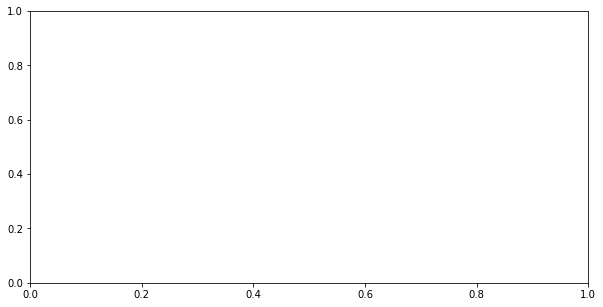

In [69]:
plt.figure(figsize=(10,5))
plt.plot(dfv.index, dfv1['Russia'])
plt.show

In [31]:
dfv1

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [52]:
a = dfc.columns
b = dfv1.columns
c = list(set(b) - set(a))
print(c)

['Niue', 'Namibia', 'Marshall Islands', 'Bermuda', 'Grenada', 'Uganda', 'Vatican', 'Bhutan', 'Bonaire Sint Eustatius and Saba', 'Faeroe Islands', 'Guernsey', 'Cambodia', 'French Polynesia', 'Jersey', 'Greenland', 'Vanuatu', 'Tonga', 'Turks and Caicos Islands', 'Seychelles', 'Tuvalu', 'Anguilla', 'Micronesia (country)', 'Gibraltar', 'Isle of Man', 'Saint Lucia', 'Northern Cyprus', 'Aruba', 'Sint Maarten (Dutch part)', 'Nauru', 'Saint Helena', 'Papua New Guinea', 'New Caledonia', 'Falkland Islands', 'Cayman Islands', 'Montserrat', 'Pitcairn', 'Kiribati', 'Saint Kitts and Nevis', 'Wallis and Futuna', 'Eritrea', 'Tokelau', 'Mongolia', 'Palau', 'Cook Islands', 'Curacao', 'Macao', 'British Virgin Islands', 'Vietnam', 'Timor', 'Dominica', 'Fiji', 'Turkmenistan', 'Saint Vincent and the Grenadines', 'Lesotho', 'Solomon Islands', 'Samoa', 'Laos']


In [53]:
for i in c:
    del dfv1[i]

In [60]:
for i in dfv1.columns:
    a = 0
    for h in range(150,708):
        if dfv1[i].iloc[h] == 0:
            if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                    a = a + 1
                    if a > 50:
                        del dfv1[i]
                        break
        

In [65]:
for i in dfv1.columns:
    for h in range(0,708):
        if dfv1[i].iloc[h] == 0:
            if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                    print(i, h)

Afghanistan 1
Afghanistan 55
Afghanistan 67
Afghanistan 71
Afghanistan 77
Afghanistan 80
Afghanistan 89
Afghanistan 101
Afghanistan 120
Afghanistan 123
Afghanistan 129
Afghanistan 133
Afghanistan 212
Afghanistan 214
Afghanistan 222
Afghanistan 229
Afghanistan 231
Afghanistan 242
Afghanistan 247
Afghanistan 294
Afghanistan 424
Afghanistan 433
Afghanistan 437
Afghanistan 439
Afghanistan 626
Afghanistan 633
Afghanistan 640
Afghanistan 676
Afghanistan 687
Africa 1
Africa 45
Africa 56
Africa 59
Africa 66
Africa 424
Albania 1
Albania 365
Albania 424
Albania 537
Albania 642
Albania 675
Albania 690
Algeria 1
Algeria 56
Algeria 64
Algeria 66
Algeria 69
Algeria 401
Algeria 424
Angola 1
Angola 81
Angola 83
Angola 86
Angola 89
Angola 92
Angola 99
Angola 109
Angola 113
Angola 118
Angola 123
Angola 126
Angola 129
Angola 131
Angola 135
Angola 140
Angola 146
Angola 152
Angola 177
Angola 186
Angola 189
Angola 280
Angola 424
Angola 627
Angola 638
Angola 642
Angola 684
Angola 705
Argentina 0
Argentina 63

Kyrgyzstan 382
Kyrgyzstan 384
Kyrgyzstan 387
Kyrgyzstan 392
Kyrgyzstan 396
Kyrgyzstan 400
Kyrgyzstan 413
Kyrgyzstan 415
Kyrgyzstan 417
Kyrgyzstan 424
Kyrgyzstan 428
Kyrgyzstan 434
Kyrgyzstan 437
Kyrgyzstan 442
Kyrgyzstan 445
Kyrgyzstan 449
Kyrgyzstan 456
Kyrgyzstan 672
Latvia 1
Latvia 62
Latvia 71
Latvia 125
Latvia 152
Latvia 159
Latvia 165
Latvia 172
Latvia 184
Latvia 193
Latvia 195
Latvia 201
Latvia 208
Latvia 222
Latvia 230
Latvia 236
Latvia 424
Lebanon 1
Lebanon 52
Lebanon 57
Lebanon 62
Lebanon 66
Lebanon 68
Lebanon 71
Lebanon 75
Lebanon 111
Lebanon 216
Lebanon 339
Lebanon 424
Lebanon 499
Lebanon 526
Lebanon 528
Lebanon 691
Liechtenstein 1
Liechtenstein 64
Liechtenstein 94
Liechtenstein 98
Liechtenstein 100
Liechtenstein 103
Liechtenstein 108
Liechtenstein 115
Liechtenstein 176
Liechtenstein 184
Liechtenstein 188
Liechtenstein 200
Liechtenstein 211
Liechtenstein 228
Liechtenstein 232
Liechtenstein 234
Liechtenstein 236
Liechtenstein 241
Liechtenstein 243
Liechtenstein 253
Liechtens

Russia 424
Rwanda 1
Rwanda 74
Rwanda 78
Rwanda 80
Rwanda 89
Rwanda 97
Rwanda 99
Rwanda 110
Rwanda 125
Rwanda 134
Rwanda 424
Rwanda 570
Rwanda 619
Saudi Arabia 1
Saudi Arabia 62
Saudi Arabia 65
Saudi Arabia 74
Saudi Arabia 77
Saudi Arabia 424
Saudi Arabia 526
Saudi Arabia 575
Saudi Arabia 579
Saudi Arabia 584
Saudi Arabia 591
Saudi Arabia 594
Saudi Arabia 597
Saudi Arabia 599
Saudi Arabia 601
Saudi Arabia 605
Saudi Arabia 614
Saudi Arabia 616
Saudi Arabia 619
Saudi Arabia 626
Saudi Arabia 631
Saudi Arabia 637
Saudi Arabia 639
Senegal 1
Senegal 64
Senegal 73
Senegal 75
Senegal 78
Senegal 424
Senegal 658
Senegal 669
Senegal 676
Senegal 689
Senegal 695
Senegal 699
Serbia 1
Serbia 66
Serbia 85
Serbia 121
Serbia 130
Serbia 206
Serbia 373
Serbia 424
Serbia 450
Serbia 453
Serbia 493
Serbia 498
Singapore 1
Singapore 24
Singapore 28
Singapore 33
Singapore 36
Singapore 50
Singapore 52
Singapore 54
Singapore 57
Singapore 63
Singapore 68
Singapore 71
Singapore 424
Singapore 587
Singapore 604
Singap

In [35]:
dfv1['Afghanistan'].iloc[133]

0.0

In [63]:
del dfv1.iloc[0]

AttributeError: __delitem__

In [62]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe,nu
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0,150
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0,151
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0,152
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0,153
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0,703
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0,704
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0,705
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0,706


In [68]:
dfv1.drop(labels = [424],axis = 0,inplace=True)